In [278]:
pwd

'/content/drive/MyDrive'

In [279]:
ls

 510519106014-EC8393.pdf   flowers.hs/
 510519106014-EC8452.pdf  'Getting started.pdf'
 510519106014-PH8151.pdf   IMG_20220203_231517.jpg
 A                         IMG_20220203_232813.jpg
 Classroom/                imgonline-com-ua-twotoone-be92jNLBld.jpg
'Colab Notebooks'/         imgonline-com-ua-twotoone-mgT98HONcF7.jpg
 flowers/                 'Problem_solution_fit Sample Template.docx'
 Flowers-Dataset.zip       SmsContactsBackup/
 flowers.h5               'Untitled form.gform'


In [280]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
ls

 510519106014-EC8393.pdf   flowers.hs/
 510519106014-EC8452.pdf  'Getting started.pdf'
 510519106014-PH8151.pdf   IMG_20220203_231517.jpg
 A                         IMG_20220203_232813.jpg
 Classroom/                imgonline-com-ua-twotoone-be92jNLBld.jpg
'Colab Notebooks'/         imgonline-com-ua-twotoone-mgT98HONcF7.jpg
 flowers/                 'Problem_solution_fit Sample Template.docx'
 Flowers-Dataset.zip       SmsContactsBackup/
 flowers.h5               'Untitled form.gform'


In [282]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [283]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/1055

In [284]:
# image Augmentation - Image Data Generator

In [285]:
train_datagen = ImageDataGenerator (rescale=1./255,zoom_range= 0.2, horizontal_flip=True, vertical_flip=False)

In [286]:
test_datagen = ImageDataGenerator (rescale=1./255)

In [287]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 7 classes.


In [288]:
x_test = train_datagen.flow_from_directory(r'/content/drive/MyDrive/flowers',target_size=(54,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 7 classes.


In [289]:
x_train.class_indices

{'assets': 0,
 'daisy': 1,
 'dandelion': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5,
 'variables': 6}

In [290]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [291]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten

In [292]:
Model = Sequential()

In [293]:
Model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [294]:
Model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [295]:
Model.add(MaxPooling2D(pool_size=(2,2)))

In [296]:
Model.add(Flatten())

In [297]:
Model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [298]:
32*(3*3*3+1)

896

In [299]:
Model.add(Dense(300,activation='relu'))

In [300]:
Model.add(Dense(150,activation='relu'))

In [301]:
Model.add(Dense(4,activation='softmax'))

In [302]:
Model.compile(loss='Categorical_Crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [303]:
len(x_train)

180

In [304]:
123/24

5.125

In [305]:
model.save('flowers')

In [306]:
ls

 510519106014-EC8393.pdf   flowers.hs/
 510519106014-EC8452.pdf  'Getting started.pdf'
 510519106014-PH8151.pdf   IMG_20220203_231517.jpg
 A                         IMG_20220203_232813.jpg
 Classroom/                imgonline-com-ua-twotoone-be92jNLBld.jpg
'Colab Notebooks'/         imgonline-com-ua-twotoone-mgT98HONcF7.jpg
 flowers/                 'Problem_solution_fit Sample Template.docx'
 Flowers-Dataset.zip       SmsContactsBackup/
 flowers.h5               'Untitled form.gform'


In [307]:
import numpy as np

In [308]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [309]:
model = load_model('flowers.h5')

In [310]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/197011740_21825de2bf.jpg")

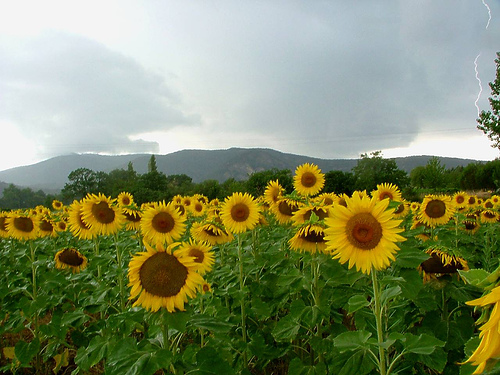

In [311]:
img

In [312]:
img=image.load_img(r"/content/drive/MyDrive/flowers/sunflower/197011740_21825de2bf.jpg",target_size=(64,64))

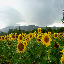

In [313]:
img

In [314]:
x = image.img_to_array(img)

In [315]:
x

array([[[244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.],
        ...,
        [164., 187., 193.],
        [157., 179., 192.],
        [147., 173., 188.]],

       [[244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.],
        ...,
        [164., 183., 197.],
        [223., 230., 238.],
        [152., 174., 185.]],

       [[244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.],
        ...,
        [160., 180., 189.],
        [149., 174., 181.],
        [154., 174., 185.]],

       ...,

       [[ 46.,  40.,   8.],
        [ 52.,  45.,   0.],
        [ 35.,  67.,   0.],
        ...,
        [194., 146.,   0.],
        [ 80.,  71.,   6.],
        [ 80.,  71.,   0.]],

       [[ 15.,  41.,   0.],
        [ 62.,  74.,   0.],
        [ 25.,  46.,   3.],
        ...,
        [221., 173.,   5.],
        [ 81.,  79.,   5.],
        [ 49.,  88.,   5.]],

       [[ 90.,  87.,  54.],
        [ 16.,  17.,   1.],
        [  0.,  

In [316]:
x = np.expand_dims(x, axis=0)

In [317]:
y = np.argmax(model.predict(x),axis=1)

In [318]:
y

array([0])

In [322]:
x_train.class_indices

{'assets': 0,
 'daisy': 1,
 'dandelion': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5,
 'variables': 6}

In [320]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [321]:
index[y[0]]

'daisy'